# Project: MovieLens Exploratory Data Analysis
Fundamentals of AIML<br>Thomas Webb<br>September 18, 2020

### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

# 1. Import the necessary packages - 2.5 marks

In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8.5)})

# 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
movie = pd.read_csv('item.csv')
rating = pd.read_csv('Data.csv')
user = pd.read_csv('user.csv')

# 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

## Movie Dataset

In [3]:
movie.shape

(1681, 22)

In [4]:
movie.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [5]:
movie.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

## Ratings Dataset

In [7]:
rating.shape

(100000, 4)

In [8]:
rating.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [9]:
rating.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


## User Dataset

In [11]:
user.shape

(943, 5)

In [12]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [13]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [14]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


# 4. Find the number of movies per genre using the item data - 2.5 marks

In [15]:
for i in movie.columns[3:]:
    movie_i = movie[movie[i] == 1]    # create subsets of data where each genre has values of 1
    print(i,movie_i.shape[0])    # extract the number of rows in the subsets for each genre (number of movies)

unknown 1
Action 251
Adventure 135
Animation 42
Childrens 122
Comedy 505
Crime 109
Documentary 50
Drama 725
Fantasy 22
Film-Noir 24
Horror 92
Musical 56
Mystery 61
Romance 247
Sci-Fi 101
Thriller 251
War 71
Western 27


# 5. Drop the movie where the genre is unknown - 2.5 marks

By looking at the value counts for the 'unknown' column, it can be determined that there is only one movie of unknown genre. We can use .drop() to remove the row and re-check the value counts to make sure there are no remaining 'unknown' genre movies.

In [16]:
movie['unknown'].value_counts()    # determine how many movies contain a 1 in the unknown genre column

0    1680
1       1
Name: unknown, dtype: int64

In [17]:
movie.drop(movie[movie['unknown'] == 1].index, inplace = True)    # only 1 unknown movie exists, so we will drop
movie['unknown'].value_counts()    # verify the unknown movie was removed

0    1680
Name: unknown, dtype: int64

# 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [18]:
movie_genre = movie.copy()

In [19]:
movie_genre.drop(['release date','movie id'], axis=1,inplace=True)

In [20]:
movie_genre['number of genres'] = movie_genre.sum(axis=1)   # create a column that shows how many genres each movie has

In [21]:
movie_multiple = movie_genre[movie_genre['number of genres'] > 1]  # creates a subset of only entries with > 1 genre

In [22]:
multiple_genre_movies = movie_multiple[['movie title', 'number of genres']].copy()
multiple_genre_movies.head()

,movie title,number of genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2


In [23]:
print(multiple_genre_movies.shape[0],'movies have multiple genres')  # .shape[0] is the number of rows in subset of only multiple genre movies

849 movies have multiple genres


# 7. Univariate plots of columns: 'rating', 'age', 'release year', 'gender' and 'occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

## Release Year

In [24]:
movie['year']=movie['release date'].str[-4:]    # create column for release year

In [25]:
total_df = pd.DataFrame(data = movie['year'].value_counts())   # create a dataframe with the total number of releases per year
total_df['release'] = total_df.index

In [26]:
total_df['percent']=total_df['year']/(len(movie['year'])/100)
total_df.sort_values(by=['release'], ascending=True)   # sort from lowest to highest year
total_df.columns = ['release count', 'year', 'percent']

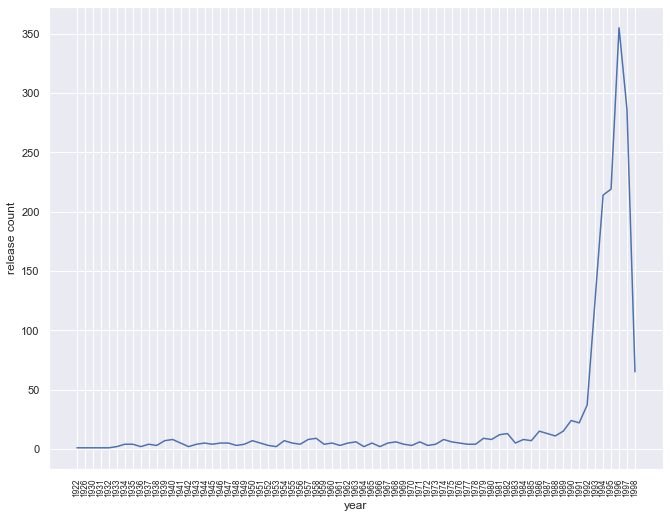

In [27]:
year_chart = sns.lineplot(y="release count", x="year", data=total_df)
for item in year_chart.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize('x-small')

## Age

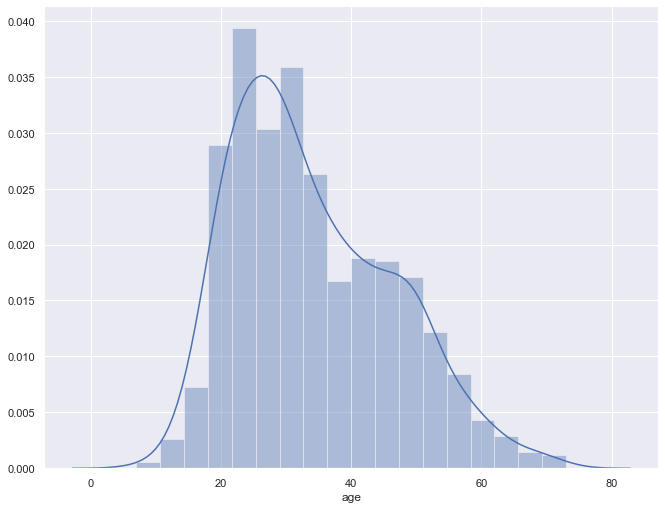

In [28]:
sns.distplot(user['age'])    # simple histogram of age

#### A more specific analysis of Age:

In [29]:
age_count = pd.DataFrame(data=user['age'].value_counts())    # creates dataframe with counts of each unique age
age_count['unique ages'] = age_count.index

In [30]:
age_count['percent'] = age_count['age']/(len(user['user id'])/100)  # percent column shows what percent of total each age count is

In [31]:
age_count.columns = ['count','age','percent']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

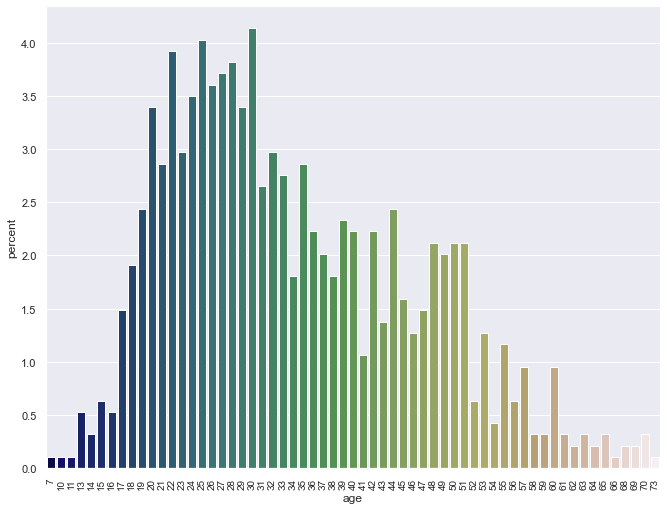

In [32]:
age_chart = sns.barplot(x='age', y='percent',data=age_count, palette='gist_earth')
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='small')

## Gender

In [33]:
gender_count = pd.DataFrame(data=user['gender'].value_counts())
gender_count['gender1'] = gender_count.index
gender_count['percent'] = gender_count['gender']/(len(user['user id'])/100)

In [34]:
gender_count.columns = ['count', 'gender', 'percent']


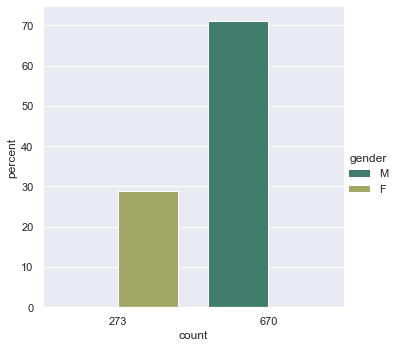

In [35]:
sns.catplot(x='count', hue='gender', y='percent',data=gender_count, kind='bar', legend = True, palette ='gist_earth')

## Occupation

In [36]:
job_count = pd.DataFrame(data=user['occupation'].value_counts())
job_count['job'] = job_count.index
job_count['percent'] = job_count['occupation']/(len(user['user id'])/100)

In [37]:
job_count.columns = ['count','job','percent']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

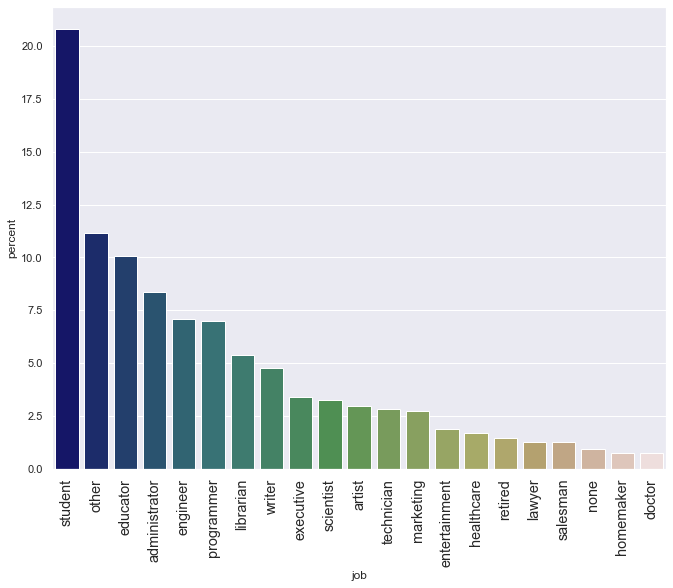

In [38]:
job_chart = sns.barplot(x='job', y='percent',data=job_count, palette='gist_earth')
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='large')

## Rating

In [39]:
rating_count = pd.DataFrame(data=rating['rating'].value_counts())

In [40]:
rating_count['rating number'] = rating_count.index

In [41]:
rating_count['percent'] = rating_count['rating']/(len(rating['rating'])/100)


In [42]:
rating_count.columns = ['count','rating','percent']


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

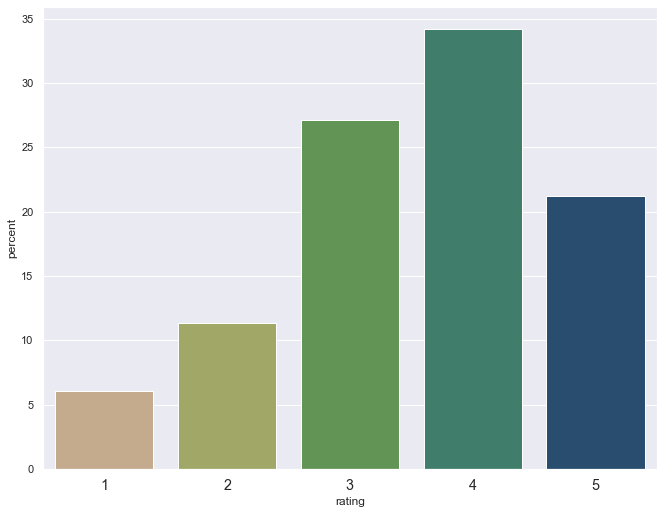

In [43]:
rating_chart = sns.barplot(x='rating', y='percent',data=rating_count, palette='gist_earth_r')
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontsize='large')

# 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [44]:
dfyear = pd.DataFrame(data=movie['year'].value_counts())
dfyear['year1'] = dfyear.index

In [45]:
dfyear.columns=['count','year']

In [46]:
movie1 = pd.merge(dfyear,movie,how='inner',on='year')

In [47]:
count_Action = pd.DataFrame(data=movie1.groupby("year")['Action'].sum())    # this line creates a subset with sum of action movies by year

In [48]:
movie2 = pd.merge(movie1,count_Action,how='inner',on='year')   # this line merges that subset with the original df

In [49]:
count_Adventure = pd.DataFrame(data=movie1.groupby("year")['Adventure'].sum())   # repeat with each genre

In [50]:
movie3 = pd.merge(movie2,count_Adventure,how='inner',on='year')

In [51]:
count_Animation = pd.DataFrame(data=movie1.groupby("year")['Animation'].sum())

In [52]:
movie4 = pd.merge(movie3,count_Animation,how='inner',on='year')

In [53]:
count_Childrens = pd.DataFrame(data=movie1.groupby("year")['Childrens'].sum())

In [54]:
movie5 = pd.merge(movie4,count_Childrens,how='inner',on='year')

In [55]:
count_Comedy = pd.DataFrame(data=movie1.groupby("year")['Comedy'].sum())

In [56]:
movie6 = pd.merge(movie5,count_Comedy,how='inner',on='year')

In [57]:
count_Crime = pd.DataFrame(data=movie1.groupby("year")['Crime'].sum())

In [58]:
movie7 = pd.merge(movie6,count_Crime,how='inner',on='year')

In [59]:
count_Documentary = pd.DataFrame(data=movie1.groupby("year")['Documentary'].sum())

In [60]:
movie8 = pd.merge(movie7,count_Documentary,how='inner',on='year')

In [61]:
count_Drama = pd.DataFrame(data=movie1.groupby("year")['Drama'].sum())

In [62]:
movie9 = pd.merge(movie8,count_Drama,how='inner',on='year')

In [63]:
count_Fantasy = pd.DataFrame(data=movie1.groupby("year")['Fantasy'].sum())

In [64]:
movie10 = pd.merge(movie9,count_Fantasy,how='inner',on='year')

In [65]:
count_FilmNoir = pd.DataFrame(data=movie1.groupby("year")['Film-Noir'].sum())

In [66]:
movie11 = pd.merge(movie10,count_FilmNoir,how='inner',on='year')

In [67]:
count_Horror = pd.DataFrame(data=movie1.groupby("year")['Horror'].sum())

In [68]:
movie12 = pd.merge(movie11,count_Horror,how='inner',on='year')

In [69]:
count_Musical = pd.DataFrame(data=movie1.groupby("year")['Musical'].sum())

In [70]:
movie13 = pd.merge(movie12,count_Musical,how='inner',on='year')

In [71]:
count_Mystery = pd.DataFrame(data=movie1.groupby("year")['Mystery'].sum())

In [72]:
movie14 = pd.merge(movie13,count_Mystery,how='inner',on='year')

In [73]:
count_Romance = pd.DataFrame(data=movie1.groupby("year")['Romance'].sum())

In [74]:
movie15 = pd.merge(movie14,count_Romance,how='inner',on='year')

In [75]:
count_SciFi = pd.DataFrame(data=movie1.groupby("year")['Sci-Fi'].sum())

In [76]:
movie16 = pd.merge(movie15,count_SciFi,how='inner',on='year')

In [77]:
count_Thriller = pd.DataFrame(data=movie1.groupby("year")['Thriller'].sum())

In [78]:
movie17 = pd.merge(movie16,count_Thriller,how='inner',on='year')

In [79]:
count_War = pd.DataFrame(data=movie1.groupby("year")['War'].sum())

In [80]:
movie18 = pd.merge(movie17,count_War,how='inner',on='year')

In [81]:
count_Western = pd.DataFrame(data=movie1.groupby("year")['Western'].sum())

In [82]:
movie19 = pd.merge(movie18,count_Western,how='inner',on='year')

In [83]:
movie19.drop(['movie id', 'movie title', 'release date','unknown','Action_x', 'Adventure_x', 'Animation_x', 'Childrens_x', 'Comedy_x',
       'Crime_x', 'Documentary_x', 'Drama_x', 'Fantasy_x', 'Film-Noir_x',
       'Horror_x', 'Musical_x', 'Mystery_x', 'Romance_x', 'Sci-Fi_x',
       'Thriller_x', 'War_x', 'Western_x'],axis=1,inplace=True)

In [84]:
movie19.columns=['total', 'year', 'Action', 'Adventure', 'Animation',   # clean up column names and drop unecessary info
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',]

In [85]:
movie19.drop_duplicates(subset=['year'],keep='first',inplace=True,ignore_index=True)   # only 1 entry from each year needed

In [86]:
movie19.set_index('year',inplace=True)

In [87]:
movie_popularity = movie19.div(movie19['total'], axis= 0) * 100   # shows each value as percent of the total

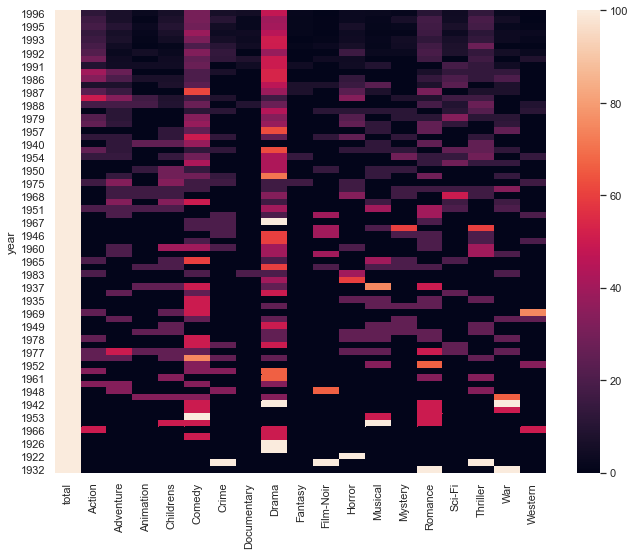

In [88]:
sns.heatmap(movie_popularity)

# 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [89]:
rating['total score'] = rating.groupby('movie id')['rating'].sum()    # create column for total score

In [90]:
rating['total ratings'] = rating.groupby('movie id')['rating'].count()    # create column for total ratings

In [91]:
rating['average rating'] = rating['total score']/rating['total ratings']    # create column for average rating

In [92]:
over100 = rating[rating['total ratings'] > 100]    # only see the movies with over 100 ratings submitted

In [93]:
sorted_over100 = over100.sort_values(by=['average rating'], ascending=False)   # sort from highest to lowest

In [94]:
top25 = sorted_over100.iloc[0:25]    # create new dataframe with only top 25 average ratings from subset of movies with over 100 ratings

In [95]:
top25_movies = pd.merge(movie,top25,how='inner', on='movie id')    # merge with movie info dataset only on entries that intersect movie id
top25_movies_sorted = top25_movies[['movie title', 'total ratings','average rating']].copy().sort_values(by=['average rating'], ascending=False)    # sort from highest to lowest average rating
top25_movies_sorted

,movie title,total ratings,average rating
21,That Thing You Do!,112.0,4.491071
11,Ulee's Gold,298.0,4.466443
6,"Good, The Bad and The Ugly, The",118.0,4.466102
16,Speed,243.0,4.456790
23,"City of Lost Children, The",283.0,4.445230
24,Grumpier Old Men,209.0,4.387560
9,Star Trek: First Contact,267.0,4.385768
4,Fargo,583.0,4.358491
5,"Abyss, The",125.0,4.344000
18,Pump Up the Volume,198.0,4.292929


### A visualization of the top 25 movies among movies with 100+ reviews

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

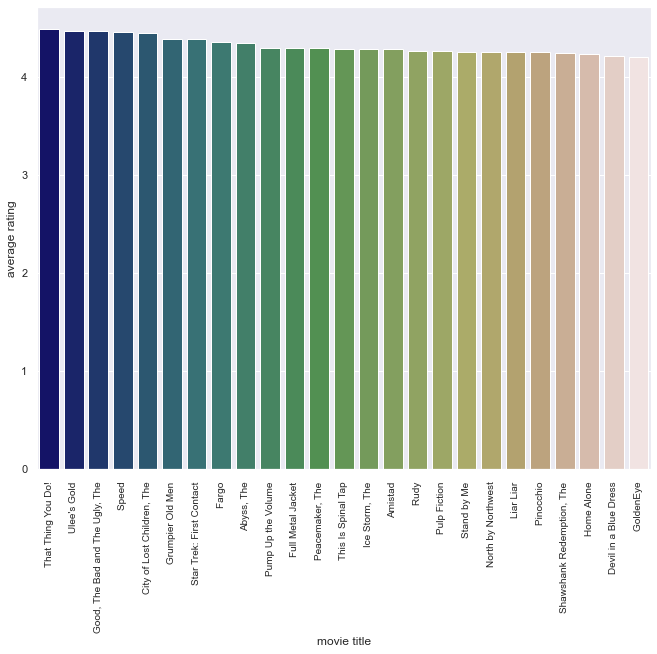

In [96]:
top_chart = sns.barplot(x='movie title', y='average rating',data=top25_movies_sorted, palette='gist_earth')
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='small')

# 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [97]:
rating_user = pd.merge(rating,user,on='user id',how='inner')   # merge the dataframes

In [98]:
complete_df = pd.merge(rating_user,movie,how='inner',on='movie id')

In [99]:
complete_df.drop(['rating','timestamp','age','occupation','zip code','release date','unknown'],axis=1,inplace=True)

In [100]:
gender_totals = pd.DataFrame(complete_df['gender'].value_counts())    # create a subset that shows the total number of each gender

In [101]:
gender_totals['gender_type'] = gender_totals.index

In [102]:
gender_totals.columns = ['total gender','gender']

In [103]:
gender_grouped = complete_df.groupby('gender').sum()   # total users for each genre, grouped by gender

In [104]:
gender_percents = gender_grouped.div(gender_totals['total gender'], axis= 0) * 100   # total for genre grouped by gender shown as percents

In [105]:
gender_totals

,total gender,gender
M,74252,M
F,25738,F


In [106]:
gender_grouped

,user id,movie id,total score,total ratings,average rating,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,,,
F,12225832,11452645,72531.0,20304.0,1066.154713,5442,3141,995,2232,8068,...,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,34019655,31096592,280455.0,79696.0,4107.752150,20147,10612,2610,4950,21764,...,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [107]:
gender_percents

,user id,movie id,total score,total ratings,average rating,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
F,47501.095656,44497.027741,281.805113,78.887248,4.142337,21.143834,12.203745,3.865879,8.672002,31.346647,...,1.410366,1.495843,4.650711,5.602611,5.105292,22.760121,10.214469,19.760665,8.504934,1.441448
M,45816.483058,41879.803911,377.706998,107.331789,5.532177,27.133276,14.291871,3.515057,6.666487,29.310995,...,1.331951,1.815439,5.548672,4.729839,5.294133,18.320045,13.603674,22.606798,9.708829,1.997253


# Conclusions:

## Statement: Men watch more Drama than Women
##### Conclusion: False.

In [108]:
if (gender_percents.at['M',"Drama"]) > (gender_percents.at['F',"Drama"]):
    print('True. Men watch',
          ((gender_percents.at['M',"Drama"])-(gender_percents.at['F',"Drama"])),
          'percent more Drama than Women.')
else:
    print('False. Women watch',
          ((gender_percents.at['F',"Drama"])-(gender_percents.at['M',"Drama"])),
          'percent more Drama than Men.')

False. Women watch 3.8654433696077604 percent more Drama than Men.


## Statement: Women watch more Sci-Fi than Men
##### Conclusion: False.

In [109]:
if (gender_percents.at['F',"Sci-Fi"]) > (gender_percents.at['M',"Sci-Fi"]):
    print('True. Women watch',
          ((gender_percents.at['F',"Sci-Fi"])-(gender_percents.at['M',"Sci-Fi"])),
          'percent more Sci-Fi than Men.')
else:
    print('False. Men watch',
          ((gender_percents.at['M',"Sci-Fi"])-(gender_percents.at['F',"Sci-Fi"])),
          'percent more Sci-Fi than Women.')

False. Men watch 3.389205096411029 percent more Sci-Fi than Women.


## Statement: Men watch more Romance than Women
##### Conclusion: False.

In [110]:
if (gender_percents.at['M',"Romance"]) > (gender_percents.at['F',"Romance"]):
    print('True. Men watch',
          ((gender_percents.at['M',"Romance"])-(gender_percents.at['F',"Romance"])),
          'percent more Romance than Women.')
else:
    print('False. Women watch',
          ((gender_percents.at['F',"Romance"])-(gender_percents.at['M',"Romance"])),
          'percent more Romance than Men.')

False. Women watch 4.440075970233771 percent more Romance than Men.
